The purpose of this tutorial is to learn how to use Artificial Intelligence techniques to accelerate materials characterization.


- First connect to google drive and do to the directory of the data

In [9]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/RENEW_summer_school_week1

MessageError: Error: credential propagation was unsuccessful

Task: Calculate the diamater of your spheres using computer vision techniques


*   Upload the photos of your spheres




In [7]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [1]:
import cv2
import numpy as np
from skimage.measure import ransac, CircleModel
import matplotlib.pyplot as plt

In [ ]:
# load the image
img = cv2.imread('/content/drive/MyDrive/RENEW_summer_school_week1/PXL_20230709_165410445.jpg',0)

# Check if image is loaded correctly
if img is None:
    print('Image not loaded')
else:
    print('Image loaded')

img = cv2.medianBlur(img,5)

# convert the grayscale image to binary image
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# detect circles in the image
circles = cv2.HoughCircles(thresh1, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        diameter = r * 2
        print("Diameter:", diameter)
else:
    print("No circles were found")


Image loaded
No circles were found


Image loaded


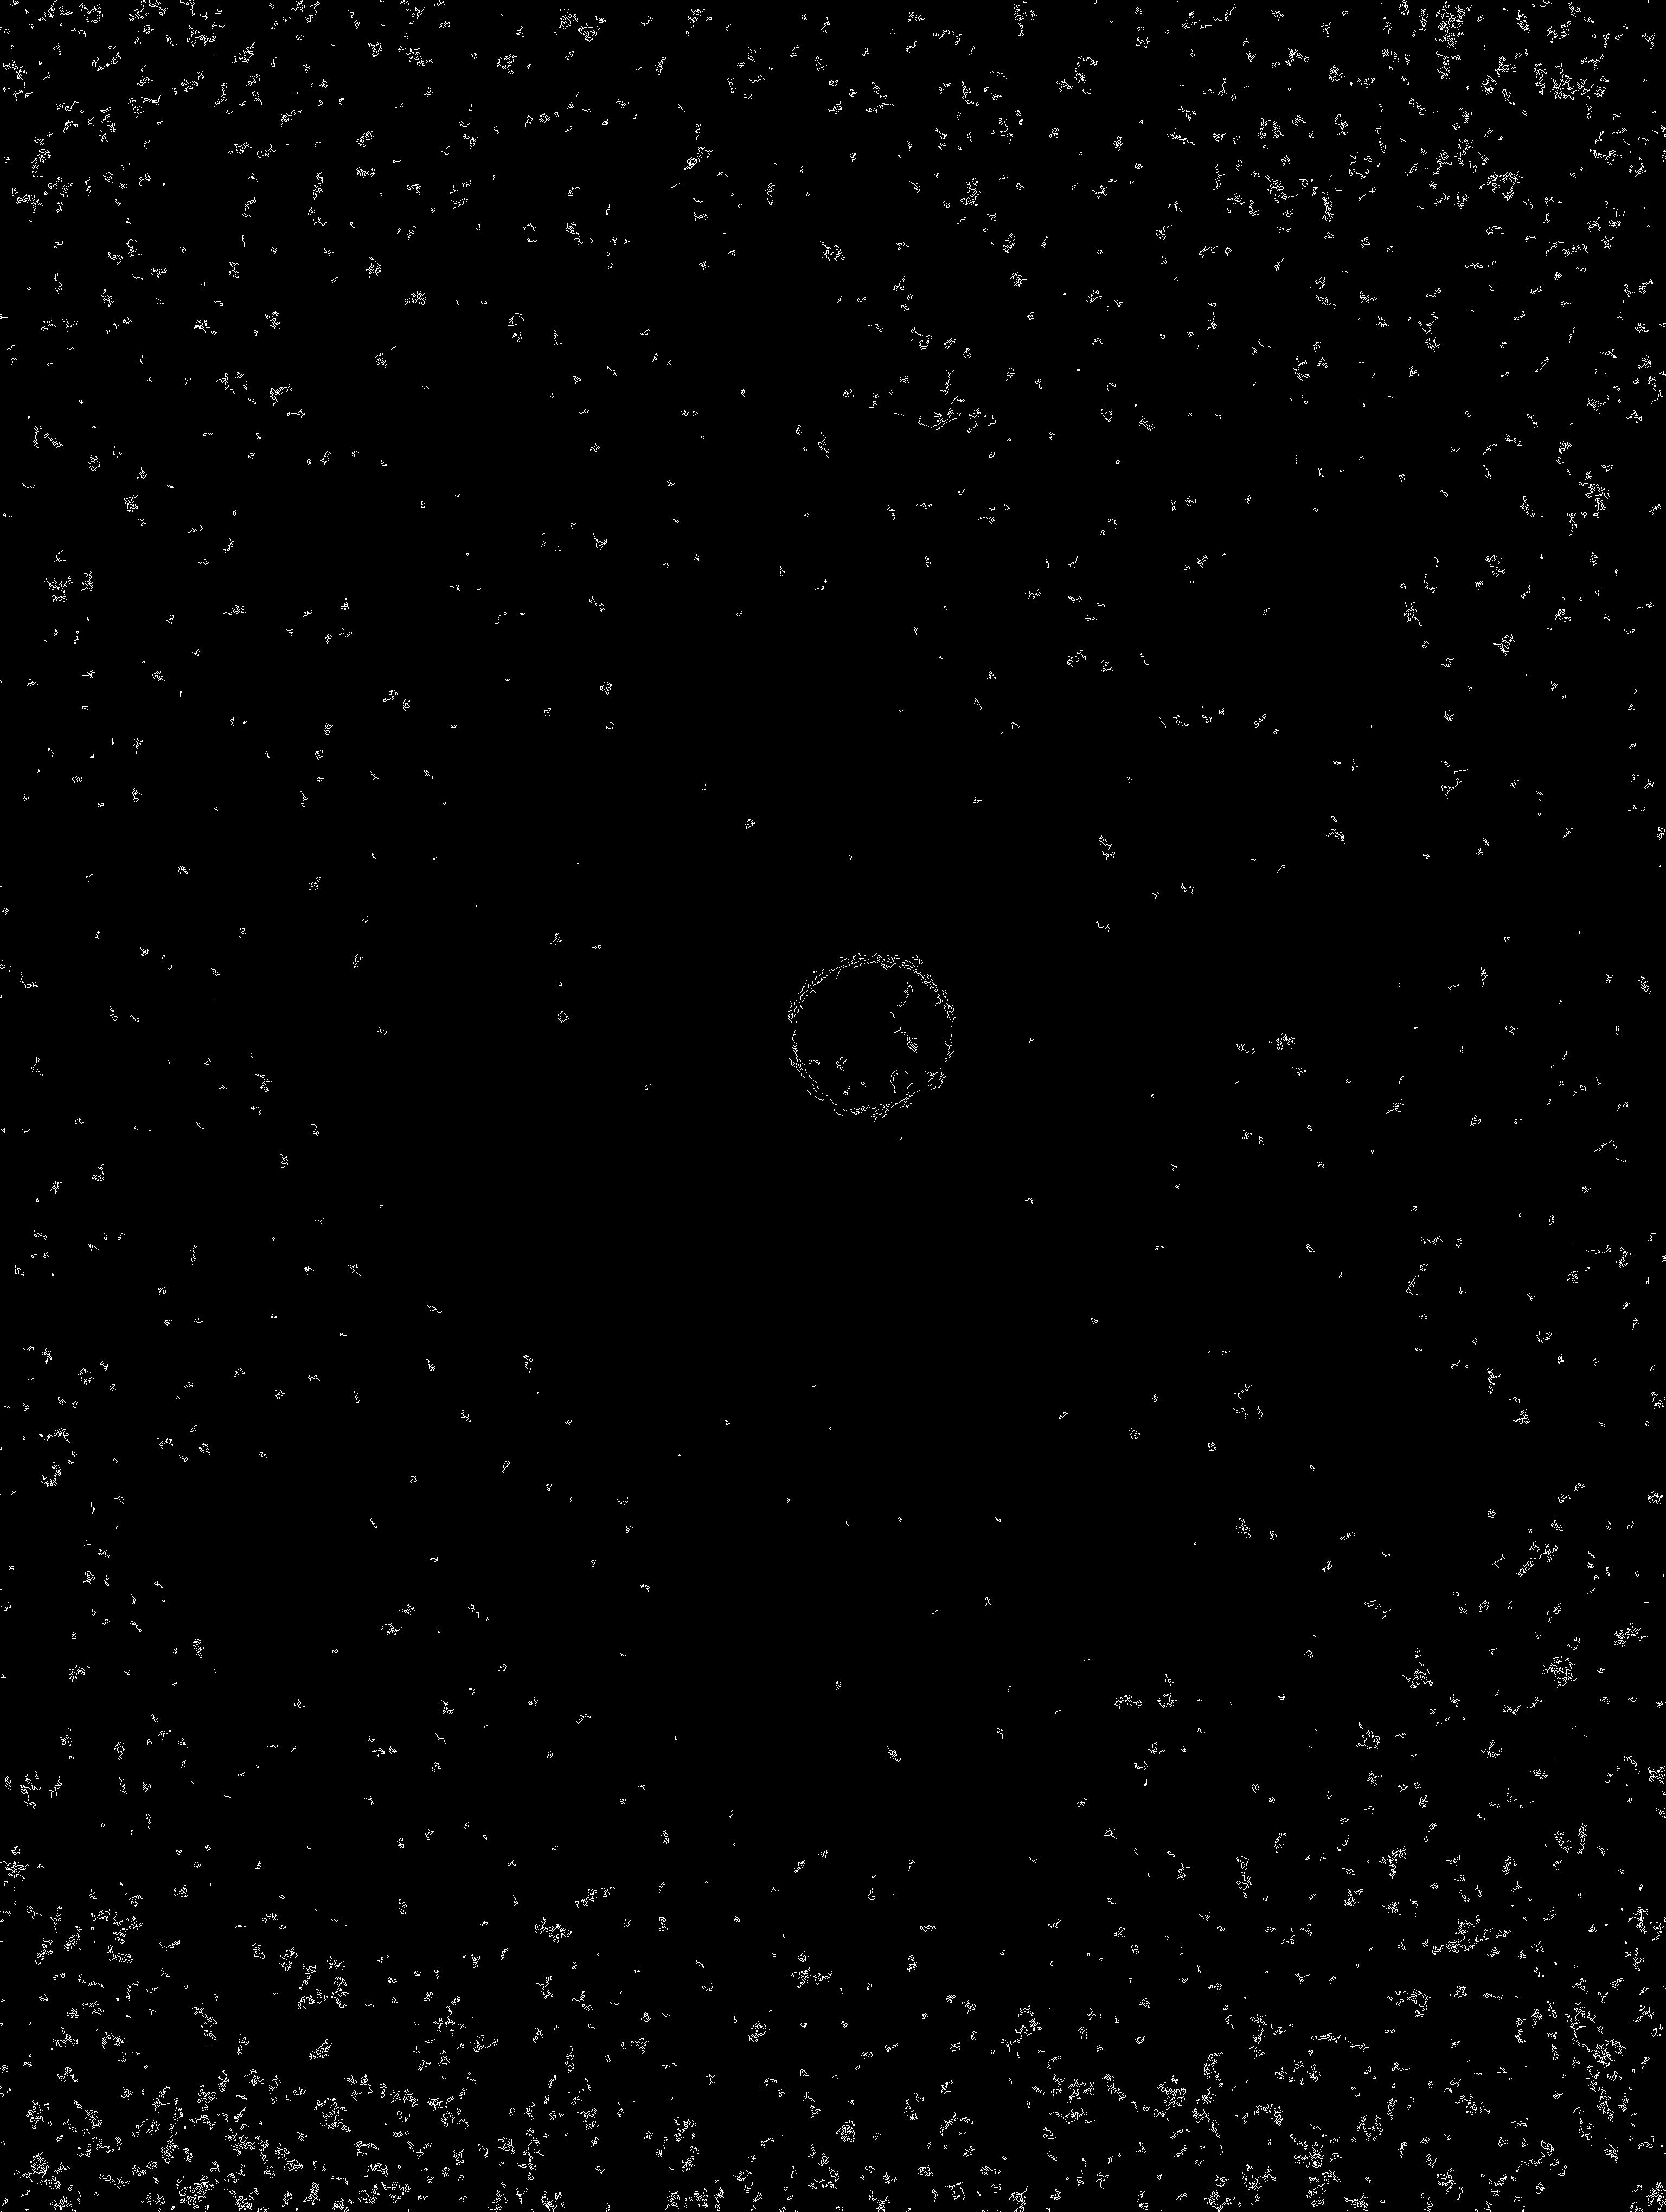

In [ ]:
import cv2
import numpy as np

# Load your image
img = cv2.imread('/content/drive/MyDrive/RENEW_summer_school_week1/PXL_20230709_180711154.jpg', 0)

# Check if image is loaded fine
if img is None:
    print('Could not open or find the image')
else:
    print('Image loaded')

# Apply Gaussian blur to smooth the image. This step is optional but recommended as it reduces noise in the image.
img = cv2.GaussianBlur(img, (5, 5), 0)

# Perform edge detection
# You can tune these numbers to make sure your Canny algorithm detects the correct circle
edges = cv2.Canny(img, 5, 20)

# Display the edges
from google.colab.patches import cv2_imshow
cv2_imshow(edges)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

Detect the circles in your image:
- param1 and param2 correspond to the two gradient values used in the Canny edge detection algorithm.
- minRadius and maxRadius specify the range of possible circle radii to be detected.

In [ ]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=3, minDist=100, param1=20, param2=30, minRadius=100, maxRadius=120)

# Ensure at least some circles were found
if circles is not None:

    # Convert the circle parameters a, b and r to integers
    circles = np.round(circles[0, :]).astype("int")
    print("Detected ", len(circles), " circles")
    for (x, y, r) in circles:
        # Draw the circle in the output image
        cv2.circle(edges, (x, y), r, (0, 255, 0), 4)
        # Draw the center of the circle
        cv2.circle(edges, (x, y), 2, (0, 0, 255), 4)

    # Display the resulting frame
    cv2_imshow(edges)
else:
    print("No circles were found")

No circles were found


Now you can find the diamer of the detected sphere by running the following cell.

In [ ]:
def calculate_diameter(circles):
    diameters = []
    if circles is not None:
        # The circles are floating point values, thus convert them to int
        circles = np.uint16(np.around(circles))

        # If only one circle is detected
        if len(circles.shape) == 1:
            x, y, r = circles[0], circles[1], circles[2]
            diameter = r * 2
            diameters.append(diameter)

        # If more than one circle is detected
        else:
            for i in circles:
                x, y, r = i[0], i[1], i[2]
                diameter = r * 2
                diameters.append(diameter)

    return diameters

In [ ]:
calculate_diameter(circles)

[238,
 216,
 224,
 234,
 238,
 238,
 228,
 224,
 238,
 216,
 220,
 224,
 234,
 224,
 206,
 234,
 238,
 238,
 224,
 220,
 202,
 238,
 216,
 206,
 234,
 212,
 238,
 220,
 224,
 206,
 224,
 212,
 228,
 220,
 206,
 224,
 220,
 212,
 228,
 220,
 216,
 206,
 224,
 220,
 216,
 238,
 202,
 228,
 216,
 216,
 212,
 206,
 238,
 238,
 202,
 238,
 224,
 202,
 238,
 220,
 234,
 220,
 212,
 202,
 216,
 212,
 220,
 202,
 202,
 206,
 228,
 220,
 212,
 202,
 234,
 224,
 224,
 202,
 206,
 206,
 224,
 212,
 216,
 212,
 206,
 202,
 224,
 228,
 224,
 216,
 206,
 238,
 216,
 212,
 202,
 224,
 206,
 202,
 228,
 206,
 216,
 220,
 220,
 238,
 238,
 216,
 220,
 202,
 238,
 202,
 238,
 202,
 212,
 234,
 216,
 238,
 238,
 202,
 216,
 206,
 234,
 220,
 228,
 216,
 234,
 212,
 212]

However, please note that this gives you the diameter in pixels. If you need the actual physical size, you need to know the scale of the image, that is, the physical size that one pixel represents. This typically requires some sort of reference object of a known size within the image or knowledge of the camera parameters and settings used to take the image.

If your image is a photograph of the sphere and you know the distance between the camera and the sphere, as well as the focal length of the camera, you can calculate the diameter of the sphere.

But, bear in mind that this method is only an approximation, because it assumes the sphere to be a circle, which holds true only if the sphere is directly facing the camera and the camera axis is perpendicular to the sphere's surface. In other cases, perspective distortion would cause the sphere to appear as an ellipse, and you'd need a more complex method to estimate the diameter.

# You could also upload an image taken from the microscope and indentify the shape

In [ ]:
img = cv2.imread('/content/drive/MyDrive/RENEW_summer_school_week1/Spherification_sphere.png')

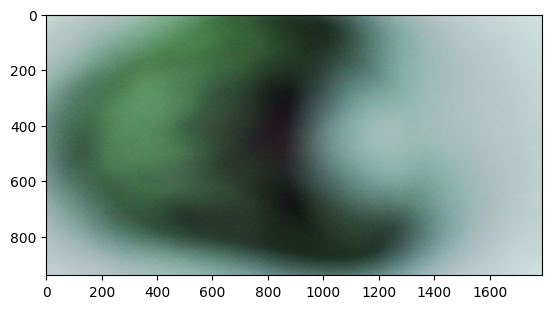

In [ ]:
plt.imshow(img)

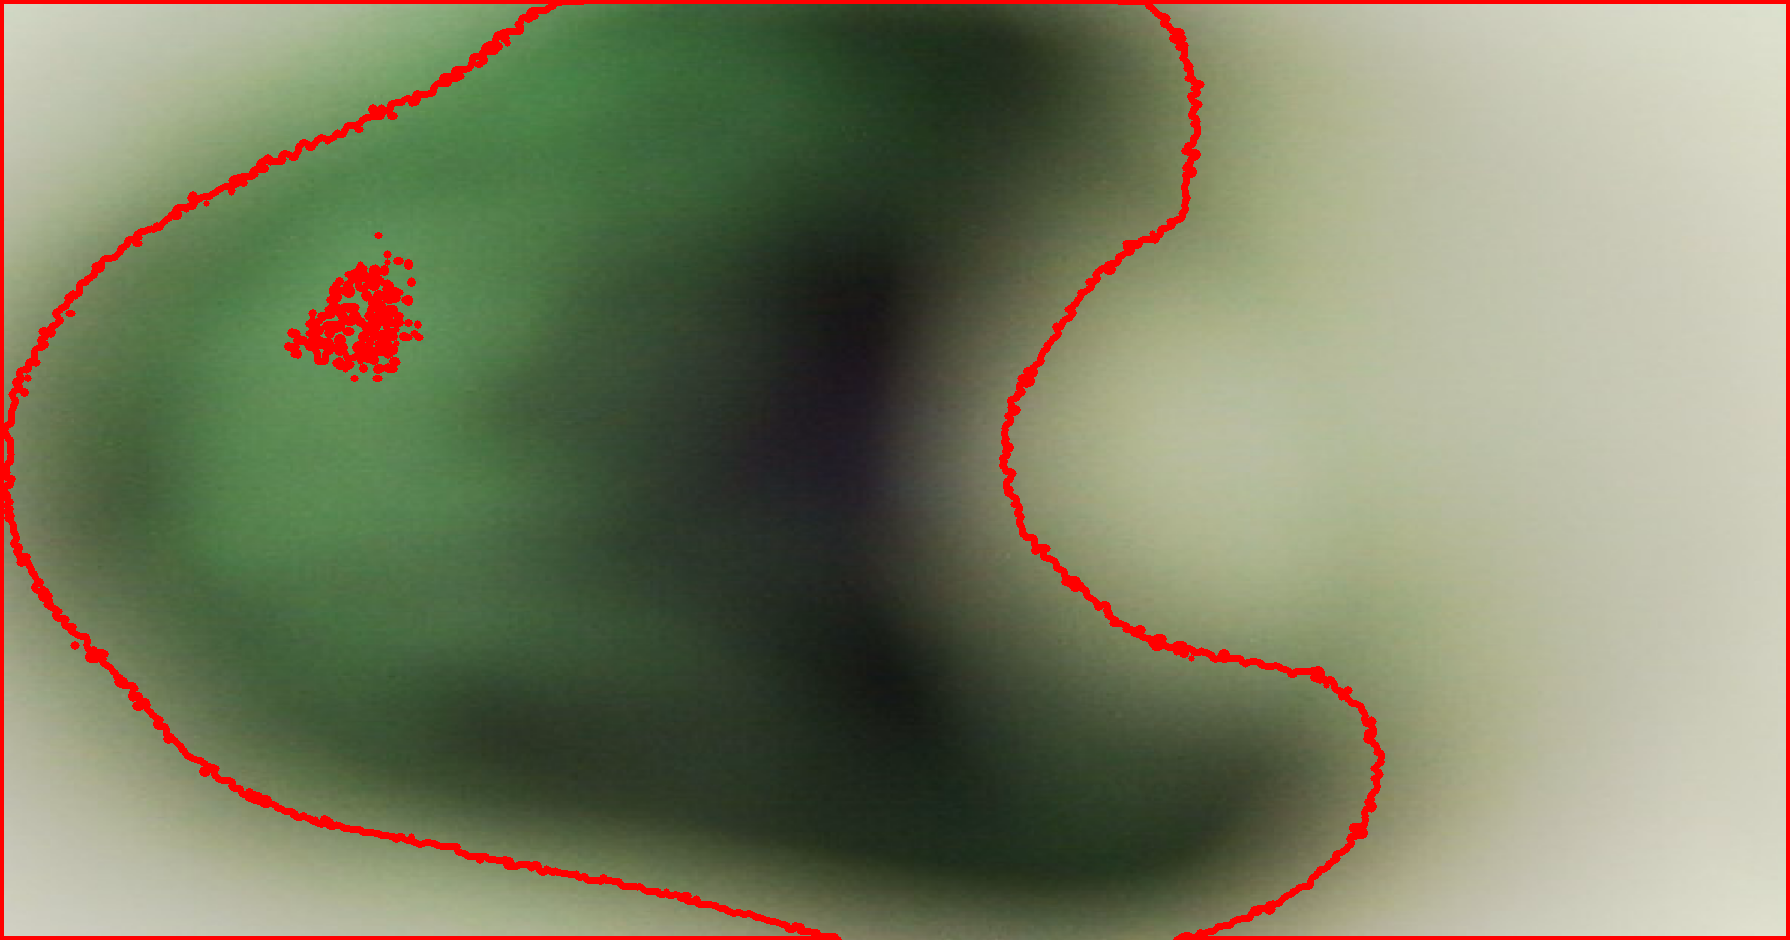

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

# list for storing names of shapes
for contour in contours:

    # here we are ignoring first counter because
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue

    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)

    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

    # finding center point of shape
    M = cv2.moments(contour)

# displaying the image after drawing contours
from google.colab.patches import cv2_imshow
cv2_imshow( img)

cv2.waitKey(0)
cv2.destroyAllWindows()